### Step 1: What is Your Idea and Research Questions, Again?

Please reiterate your project idea below (you can copy it from the project proposal if there were no changes).

Crime Hotspot Detection System: Identify high-crime areas using location data (Area ID, Reporting District, Address, Cross Street, and Coordinates) and visualize these hotspots on an interactive map to aid law enforcement in resource allocation and strategic planning.

Temporal Crime Trend Analysis: Examine trends in crime occurrences based on time, day, month, and season. Analyze peak times for various crime types and provide visualizations such as daily/monthly crime rates to uncover patterns (e.g., increased crime on weekends or specific hours).

Demographic Risk Assessment: Utilize victim demographics (Age, Sex, and Descent) to assess which groups are most affected by specific crimes. This will provide insights for targeted interventions by social services and law enforcement.

Research Questions:

- Which regions in Los Angeles have the highest concentration of crimes, and what are the specific crime types in these areas?
- How do crime rates vary across different times, days, and seasons?
- Which demographic groups are most affected by specific types of crimes?

### Step 2: Problem Analysis - Roadmap

What are the preliminary major steps you will be completing? Include the research question and steps taken to answer that question? Are there any unique functions you will be incorporating which we have not covered in the classroom? Describe below.

`--== Double-click and describe steps towards analysis of your project below  ==--`


Q] Which regions in Los Angeles have the highest concentration of crimes, and what are the specific crime types in these areas?

Steps:
- Extract location-based fields (Area ID, Reporting District, Coordinates).
- Perform data wrangling to clean and standardize location data.
- Aggregate crime counts by region and type.
- Use geospatial analysis libraries like GeoPandas and Folium to create an interactive heatmap visualizing hotspots.

Q] How do crime rates vary across different times, days, and seasons?

Steps:
- Parse date/time fields into meaningful components (day of the week, month, year).
- Group data by time intervals and calculate crime frequencies.
- Generate visualizations such as time series plots and heatmaps using Matplotlib and Seaborn.
- Identify and highlight peak crime periods.

Q] Which demographic groups are most affected by specific types of crimes?

Steps:
- Filter and analyze demographic data fields (Age, Sex, and Descent).
- Group data by crime type and demographics.
- Visualize trends and distributions using boxplots and bar charts.

### Step 3: Preliminary Code

Include coding that has been completed at this preliminary stage.  

In [1]:
# Step 3: Write code here. Add additional cells as necessary.

In [1]:
#Installing and Loading necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Reading the crime dataset from a CSV file and displaying the first 5 rows for an initial preview
df=pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,8/18/2022 0:00,8/17/2020 0:00,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [3]:
# Displaying the number of rows and columns in the dataset
df.shape

(990293, 28)

In [4]:
# Listing all column names in the dataset to understand available data fields
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [5]:
#To get bottom 5 rows of the dataset
df.tail() 

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
990288,240710284,7/24/2024 0:00,7/23/2024 0:00,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,4000 W 23RD ST,NaN,34.0362,-118.3284
990289,240104953,1/15/2024 0:00,1/15/2024 0:00,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
990290,240410786,10/14/2024 0:00,10/11/2024 0:00,2330,4,Hollenbeck,421,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,1700 ALBION ST,NaN,34.0675,-118.2240
990291,240309674,4/24/2024 0:00,4/24/2024 0:00,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868
990292,240910892,8/13/2024 0:00,8/12/2024 0:00,2300,9,Van Nuys,914,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,6900 VESPER AV,NaN,34.1961,-118.4510


In [6]:
#To understand the dataset
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990293 entries, 0 to 990292
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           990293 non-null  int64  
 1   Date Rptd       990293 non-null  object 
 2   DATE OCC        990293 non-null  object 
 3   TIME OCC        990293 non-null  int64  
 4   AREA            990293 non-null  int64  
 5   AREA NAME       990293 non-null  object 
 6   Rpt Dist No     990293 non-null  int64  
 7   Part 1-2        990293 non-null  int64  
 8   Crm Cd          990293 non-null  int64  
 9   Crm Cd Desc     990293 non-null  object 
 10  Mocodes         842641 non-null  object 
 11  Vict Age        990293 non-null  int64  
 12  Vict Sex        849515 non-null  object 
 13  Vict Descent    849504 non-null  object 
 14  Premis Cd       989970 non-null  float64
 15  Premis Desc     989399 non-null  object 
 16  Weapon Used Cd  326547 non-null  float64
 17  Weapon Des

In [7]:
#checking for duplicates
df.nunique()

DR_NO             990293
Date Rptd           1763
DATE OCC            1763
TIME OCC            1439
AREA                  21
AREA NAME             21
Rpt Dist No         1210
Part 1-2               2
Crm Cd               140
Crm Cd Desc          140
Mocodes           309791
Vict Age             104
Vict Sex               5
Vict Descent          20
Premis Cd            314
Premis Desc          306
Weapon Used Cd        79
Weapon Desc           79
Status                 6
Status Desc            6
Crm Cd 1             142
Crm Cd 2             126
Crm Cd 3              37
Crm Cd 4               6
LOCATION           66366
Cross Street       10353
LAT                 5424
LON                 4981
dtype: int64

In [8]:
#check number of missing records in each column
df.isnull().sum() 

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           147652
Vict Age               0
Vict Sex          140778
Vict Descent      140789
Premis Cd            323
Premis Desc          894
Weapon Used Cd    663746
Weapon Desc       663746
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          921336
Crm Cd 3          987982
Crm Cd 4          990229
LOCATION               0
Cross Street      837652
LAT                    0
LON                    0
dtype: int64



**Data Cleaning**

------------------------------------------------------------------------


In [9]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [10]:
#Replacing blank values with underscore and converting everything to lower case.
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1-2', 'crm_cd', 'crm_cd_desc', 'mocodes',
       'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'crm_cd_1',
       'crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'location', 'cross_street', 'lat',
       'lon'],
      dtype='object')

In [11]:
#Drop dupliocate values
df.drop_duplicates(inplace=True)

In [12]:
df.tail()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
990288,240710284,7/24/2024 0:00,7/23/2024 0:00,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,4000 W 23RD ST,NaN,34.0362,-118.3284
990289,240104953,1/15/2024 0:00,1/15/2024 0:00,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
990290,240410786,10/14/2024 0:00,10/11/2024 0:00,2330,4,Hollenbeck,421,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,1700 ALBION ST,NaN,34.0675,-118.2240
990291,240309674,4/24/2024 0:00,4/24/2024 0:00,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868
990292,240910892,8/13/2024 0:00,8/12/2024 0:00,2300,9,Van Nuys,914,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,6900 VESPER AV,NaN,34.1961,-118.4510


In [13]:
# Check if the 'mocodes' column exists in the dataset
if 'mocodes' in df.columns:
    # Print the initial count of rows in the dataset
    print(f"Initial number of rows: {len(df)}")

    # Drop rows where 'mocodes' has missing (NaN) values
    df = df.dropna(subset=['mocodes'])
    # Print the count of rows after removing missing 'mocodes'
    print(f"Number of rows after dropping missing MO codes: {len(df)}")
else:
    # Inform the user if the 'mocodes' column is not found in the dataset
    print("'mo_codes' column not found in the dataset.")


Initial number of rows: 990293
Number of rows after dropping missing MO codes: 842641


In [14]:
# Check if the 'vict_sex' column exists in the dataset
if 'vict_sex' in df.columns:
    # Print the initial count of rows in the dataset
    print(f"Initial number of rows: {len(df)}")

    # Drop rows where 'vict_sex' has missing (NaN) values
    df = df.dropna(subset=['vict_sex'])
    # Print the count of rows after removing rows with missing 'vict_sex'
    print(f"Number of rows after dropping missing Victim Sex: {len(df)}")
else:
    # Inform the user if the 'vict_sex' column is not found in the dataset
    print("'vict_sex' column not found in the dataset.")

Initial number of rows: 842641
Number of rows after dropping missing Victim Sex: 842395


In [15]:
df.isnull().sum() 

dr_no                  0
date_rptd              0
date_occ               0
time_occ               0
area                   0
area_name              0
rpt_dist_no            0
part_1-2               0
crm_cd                 0
crm_cd_desc            0
mocodes                0
vict_age               0
vict_sex               0
vict_descent          11
premis_cd            168
premis_desc          736
weapon_used_cd    516592
weapon_desc       516592
status                 0
status_desc            0
crm_cd_1              10
crm_cd_2          773720
crm_cd_3          840087
crm_cd_4          842331
location               0
cross_street      716087
lat                    0
lon                    0
dtype: int64

In [16]:
# Define the list of columns to be dropped from the dataset
columns_to_drop = ['crm_cd_2', 'crm_cd_3', 'crm_cd_4']

# Check which of the specified columns exist in the dataset
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
if existing_columns_to_drop:
    # Print the list of columns before dropping the specified ones
    print(f"Columns before dropping: {df.columns.tolist()}")

    # Drop the identified existing columns from the dataset
    df = df.drop(columns=existing_columns_to_drop)

    # Print the list of columns after dropping the specified ones
    print(f"Columns after dropping {existing_columns_to_drop}: {df.columns.tolist()}")
else:
    # Inform the user if none of the specified columns are found in the dataset
    print(f"None of the columns {columns_to_drop} found in the dataset.")


Columns before dropping: ['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name', 'rpt_dist_no', 'part_1-2', 'crm_cd', 'crm_cd_desc', 'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'crm_cd_1', 'crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'location', 'cross_street', 'lat', 'lon']
Columns after dropping ['crm_cd_2', 'crm_cd_3', 'crm_cd_4']: ['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name', 'rpt_dist_no', 'part_1-2', 'crm_cd', 'crm_cd_desc', 'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'crm_cd_1', 'location', 'cross_street', 'lat', 'lon']


In [17]:
# Check if the 'cross_street' column exists in the dataset
if 'cross_street' in df.columns:
    # Print the list of columns before dropping 'cross_street'
    print(f"Columns before dropping 'cross_street': {df.columns.tolist()}")

    # Drop the 'cross_street' column from the dataset
    df = df.drop(columns=['cross_street'])

    # Print the list of columns after dropping 'cross_street'
    print(f"Columns after dropping 'cross_street': {df.columns.tolist()}")
else:
    # Inform the user if the 'cross_street' column is not found in the dataset
    print("'cross_street' column not found in the dataset.")

Columns before dropping 'cross_street': ['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name', 'rpt_dist_no', 'part_1-2', 'crm_cd', 'crm_cd_desc', 'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'crm_cd_1', 'location', 'cross_street', 'lat', 'lon']
Columns after dropping 'cross_street': ['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name', 'rpt_dist_no', 'part_1-2', 'crm_cd', 'crm_cd_desc', 'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'crm_cd_1', 'location', 'lat', 'lon']


In [18]:
df.isnull().sum() 

dr_no                  0
date_rptd              0
date_occ               0
time_occ               0
area                   0
area_name              0
rpt_dist_no            0
part_1-2               0
crm_cd                 0
crm_cd_desc            0
mocodes                0
vict_age               0
vict_sex               0
vict_descent          11
premis_cd            168
premis_desc          736
weapon_used_cd    516592
weapon_desc       516592
status                 0
status_desc            0
crm_cd_1              10
location               0
lat                    0
lon                    0
dtype: int64

In [19]:
df.nunique()

dr_no             842395
date_rptd           1763
date_occ            1763
time_occ            1439
area                  21
area_name             21
rpt_dist_no         1199
part_1-2               2
crm_cd               139
crm_cd_desc          139
mocodes           309725
vict_age             103
vict_sex               5
vict_descent          20
premis_cd            314
premis_desc          306
weapon_used_cd        79
weapon_desc           79
status                 6
status_desc            6
crm_cd_1             140
location           63064
lat                 5379
lon                 4969
dtype: int64

**Research Question**
-----------------

*How do crime patterns in Los Angeles vary by area and time of day?*


-----------------

In [20]:
#Handling time_occurred column and formatting it it hour and minutes format, 24 hour clock

df['time_occ'] = df['time_occ'].astype(str).str.zfill(4)
df['time_occ'] = df['time_occ'].str.replace(r'(\d{2})(\d{2})', r'\1:\2', regex=True) 

# Display updated DataFrame
print(df)

            dr_no        date_rptd         date_occ time_occ  area  \
1       200106753    2/9/2020 0:00    2/8/2020 0:00    18:00     1   
2       200320258  11/11/2020 0:00   11/4/2020 0:00    17:00     3   
3       200907217   5/10/2023 0:00   3/10/2020 0:00    20:37     9   
4       220614831   8/18/2022 0:00   8/17/2020 0:00    12:00     6   
5       231808869    4/4/2023 0:00   12/1/2020 0:00    23:00    18   
...           ...              ...              ...      ...   ...   
990286  242011172   8/20/2024 0:00   8/17/2024 0:00    23:00    20   
990287  241414280  10/16/2024 0:00  10/16/2024 0:00    15:46    14   
990289  240104953   1/15/2024 0:00   1/15/2024 0:00    01:00     1   
990290  240410786  10/14/2024 0:00  10/11/2024 0:00    23:30     4   
990291  240309674   4/24/2024 0:00   4/24/2024 0:00    15:00     3   

         area_name  rpt_dist_no  part_1-2  crm_cd  \
1          Central          182         1     330   
2        Southwest          356         1     480   


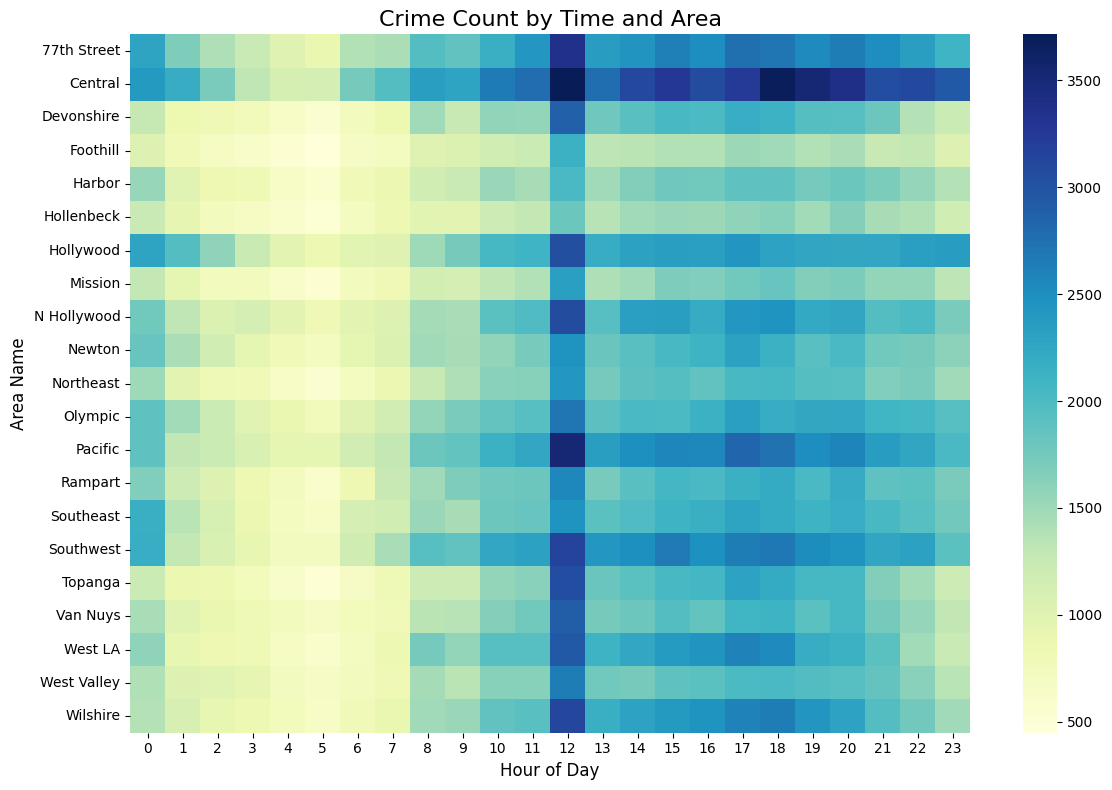

In [21]:
# Ensure 4-digit format for time_occ
df['time_occ'] = df['time_occ'].astype(str).str.zfill(4)
# Format time_occ as HH:MM
df['time_occ'] = df['time_occ'].str.replace(r'(\d{2})(\d{2})', r'\1:\2', regex=True)
# Extract hour as an integer
df['hour'] = df['time_occ'].str[:2].astype(int)

# Group by area_name and hour, and count crimes
if 'area_name' in df.columns:
    time_area_counts = df.groupby(['area_name', 'hour']).size().reset_index(name='Crime Count')
else:
    print("area_name column not found in dataset.")

# Pivot data to create a heatmap-compatible DataFrame
heatmap_data = time_area_counts.pivot(index='area_name', columns='hour', values='Crime Count').fillna(0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Crime Count by Time and Area", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Area Name", fontsize=12)
plt.tight_layout()
plt.show()


*Crime Count by Area name and time*
----------------------------------

+ Peak Crime Hours:
Crimes tend to peak around 12:00 PM (noon) across multiple areas, as indicated by the darkest cells in the heatmap.
A noticeable increase in crime activity is also observed during the early evening hours, particularly between 5:00 PM and 9:00 PM in some areas.

+ High-Crime Areas:
Certain areas like Central, Rampart, and Hollywood show consistently higher crime counts compared to others, especially during the peak hours. These areas may require enhanced monitoring and resource allocation.

+ Low-Crime Times:
Early morning hours, such as between 2:00 AM and 6:00 AM, generally exhibit the lowest crime activity across all areas. This is likely due to reduced human activity during these hours.
Area-Specific Insights:

*Areas like Northeast and Van Nuys show a relatively uniform distribution of crime throughout the day, with no sharp peaks compared to areas like Central or Hollywood*

Overall, this analysis reveals significant variations in crime patterns across time and locations, which can inform strategic decision-making for crime reduction and community safety initiatives.

In [22]:
# Total crimes per area
crime_by_area = df.groupby('area_name').size().reset_index(name='crime_count')

# Add latitude and longitude for mapping if available
location_data = df[['area_name', 'lat', 'lon']].drop_duplicates()
crime_by_area = crime_by_area.merge(location_data, on='area_name', how='left')

print(crime_by_area.head())


     area_name  crime_count      lat       lon
0  77th Street        50672  33.9785 -118.3068
1  77th Street        50672  33.9837 -118.3216
2  77th Street        50672  33.9610 -118.2739
3  77th Street        50672  33.9679 -118.2695
4  77th Street        50672  33.9739 -118.2630


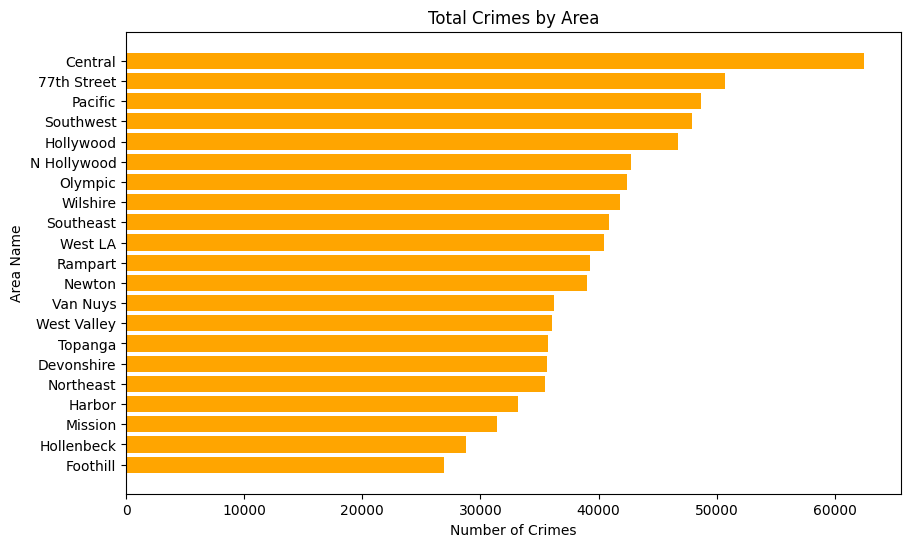

In [23]:
import matplotlib.pyplot as plt

# Sort by crime count for better visualization
sorted_crime_by_area = crime_by_area.sort_values('crime_count', ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_crime_by_area['area_name'], sorted_crime_by_area['crime_count'], color='orange')
plt.xlabel('Number of Crimes')
plt.ylabel('Area Name')
plt.title('Total Crimes by Area')
plt.gca().invert_yaxis()  # To display the highest crime area at the top
plt.show()


In [24]:
import folium
from folium.plugins import HeatMap

# Filter data for heatmap
heatmap_data = crime_by_area[['lat', 'lon', 'crime_count']].dropna()

# Create base map
la_map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)  # Centered on LA

# Add heatmap
HeatMap(data=heatmap_data[['lat', 'lon', 'crime_count']].values.tolist(),
        radius=15, blur=10, max_zoom=1).add_to(la_map)

# Display map
la_map.save('la_crime_heatmap.html')
print("Heatmap saved as 'la_crime_heatmap.html'. Open this file in your browser.")


Heatmap saved as 'la_crime_heatmap.html'. Open this file in your browser.


In [25]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd

# Filter data for the Central area
central_data = df[df['area_name'] == 'Central']

# Group by latitude and longitude to find crime counts per location
top_locations = central_data.groupby(['lat', 'lon']).size().reset_index(name='crime_count')

# Sort by crime count to get the top 5 locations
top_5_locations = top_locations.nlargest(5, 'crime_count')

# Display the top 5 locations
print("Top 5 locations with the highest crime counts in the Central area:")
print(top_5_locations)


Top 5 locations with the highest crime counts in the Central area:
          lat       lon  crime_count
1259  34.0561 -118.2375         2325
896   34.0483 -118.2631         1729
877   34.0480 -118.2577         1095
526   34.0421 -118.2469          750
748   34.0460 -118.2510          702


In [27]:
import pandas as pd
import folium

# Filter data for 77th Street, Pacific, and Central areas
selected_areas = ['77th Street', 'Pacific', 'Central']
filtered_data = df[df['area_name'].isin(selected_areas)]

# Group by area, latitude, and longitude to calculate crime counts
top_locations = filtered_data.groupby(['area_name', 'lat', 'lon']).size().reset_index(name='crime_count')

# Separate data for each area and get top 5 locations for each
top_77th = top_locations[top_locations['area_name'] == '77th Street'].nlargest(5, 'crime_count')
top_pacific = top_locations[top_locations['area_name'] == 'Pacific'].nlargest(5, 'crime_count')
top_central = top_locations[top_locations['area_name'] == 'Central'].nlargest(5, 'crime_count')

# Create a map centered on Los Angeles
crime_map = folium.Map(location=[34.0522, -118.2437], zoom_start=12)

# Add markers for the top 5 locations in 77th Street
for _, row in top_77th.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"77th Street - Crimes: {row['crime_count']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(crime_map)

# Add markers for the top 5 locations in Pacific
for _, row in top_pacific.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Pacific - Crimes: {row['crime_count']}",
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(crime_map)

# Add markers for the top 5 locations in Central
for _, row in top_central.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Central - Crimes: {row['crime_count']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(crime_map)

# Save the map to an HTML file
crime_map.save('top_5_crime_locations_combined.html')
print("Map saved as 'top_5_crime_locations_combined.html'.")


Map saved as 'top_5_crime_locations_combined.html'.


In [36]:
import pandas as pd

# Filter data for the selected areas
selected_areas = ['Central', '77th Street', 'Pacific']
filtered_data = df[df['area_name'].isin(selected_areas)]

# Group by area and crime type, count occurrences
crime_counts = (
    filtered_data.groupby(['area_name', 'crm_cd_desc'])
    .size()
    .reset_index(name='crime_count')
)

# Sort the grouped data by area and crime count in descending order
sorted_crime_counts = crime_counts.sort_values(['area_name', 'crime_count'], ascending=[True, False])

# Get the top 3 crime types for each area
top_3_crimes = sorted_crime_counts.groupby('area_name').head(3).reset_index(drop=True)

# Display the results
print("Top 3 crime types in each area:")
print(top_3_crimes)


Top 3 crime types in each area:
     area_name                                        crm_cd_desc  crime_count
0  77th Street     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT         5905
1  77th Street                           BATTERY - SIMPLE ASSAULT         4687
2  77th Street                  INTIMATE PARTNER - SIMPLE ASSAULT         4055
3      Central                              BURGLARY FROM VEHICLE         9339
4      Central                           BATTERY - SIMPLE ASSAULT         6798
5      Central  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...         4708
6      Pacific                 THEFT PLAIN - PETTY ($950 & UNDER)         4844
7      Pacific                                           BURGLARY         4400
8      Pacific                              BURGLARY FROM VEHICLE         3873


In [41]:
!pip install pandas numpy matplotlib pyfiglet plotly dash holoviews geoviews bokeh cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 67.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 67.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 45.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 MB 36.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.8/116.8 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.3/260.3 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 11.3 MB/s eta 0:00:00


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyfiglet
import plotly.graph_objects as go
import dash

from dash import dcc, html
from dash.dependencies import Input, Output
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

In [45]:
from dash import Input, Output, dcc, html
import plotly.express as px

app = dash.Dash(__name__)

class CrimeDashBoardBasedOnGender:
    def _init_(self, app, df):
        """
        Initialize the CrimeDashBoardBasedOnGender class with Dash app instance and dataset.
        """
        self.app = app
        self.df = df

    def victims_gender_layout(self):
        """
        Define the Dash layout for displaying total crimes and toggling between male and female victims.
        """
        self.app.layout = html.Div([
            # Display Total Crimes
            html.H3(id="total-crimes", style={'textAlign': 'center', 'marginBottom': '20px'}),

            # Buttons for Male and Female Victims
            html.Div([
                html.Button("Male Victims", id="btn-male", n_clicks=0, style={'marginRight': '10px'}),
                html.Button("Female Victims", id="btn-female", n_clicks=0),
            ], style={'textAlign': 'center', 'marginBottom': '20px'}),

            # Crime Chart
            dcc.Graph(id="crime-chart", figure=px.bar())
        ])

    def add_callbacks(self):
        """
        Add Dash callbacks for interactive functionality to toggle data by victim gender.
        """
        @self.app.callback(
            [Output("total-crimes", "children"),
             Output("crime-chart", "figure")],
            [Input("btn-male", "n_clicks"),
             Input("btn-female", "n_clicks")]
        )
        def update_dashboard(n_clicks_male, n_clicks_female):
            """
            Update the dashboard based on button clicks.
            """
            # Determine which button was clicked
            if n_clicks_male > n_clicks_female:
                filtered_df = self.df[self.df['vict_sex'] == "M"]
                title = "Crimes with Male Victims"
            elif n_clicks_female > n_clicks_male:
                filtered_df = self.df[self.df['vict_sex'] == "F"]
                title = "Crimes with Female Victims"
            else:
                # Default to all data if no button or equal clicks
                filtered_df = self.df
                title = "Total Crimes"

            # Total Crimes Count
            total_crimes = len(filtered_df)

            # Filter and group data for the chart
            area_filter = ['Central', '77th Street', 'Pacific']
            grouped_data = (
                filtered_df[filtered_df['area_name'].isin(area_filter)]
                .groupby(['area_name'])
                .size()
                .reset_index(name='count')
                .sort_values(by='count', ascending=False)
            )

            # Create the bar chart
            fig = px.bar(
                grouped_data,
                x='count',
                y='area_name',
                orientation='h',
                color='area_name',
                title=title,
                labels={'count': 'Count', 'area_name': 'Area Name'}
            )
            fig.update_layout(showlegend=False, template="plotly_white")

            # Return updated total crimes text and chart figure
            return f"Total Crimes: {total_crimes}", fig


# Instantiate the dashboard
# Replace df with your actual DataFrame
dashboard = CrimeDashBoardBasedOnGender(app, df)
dashboard.victims_gender_layout()
dashboard.add_callbacks()
app.run_server(debug=True)

TypeError: CrimeDashBoardBasedOnGender() takes no arguments

### Step 4: Meeting Schedule 

We are all busy. You and your team should be working towards this project on a weekly basis. Share your proposed schedule below.

`--== Double-click and describe your project schedule below  ==--`

1. Weekly Team Meetings (Every Sunday at 4:00 PM)

Goal: Review progress, assign tasks for the upcoming week, discuss challenges, and ensure alignment.
Duration: 1 hour
Agenda:
Status updates from each team member
Roadblocks and support needed
Review of previous week’s tasks
Set tasks for the upcoming week

2. Project Progress Report (Due 11/17)

Meeting Date: 11/14 (Wednesday)
Goal: Discuss the draft of the progress report. Ensure all members provide updates on their tasks.
Agenda:
Complete draft of the progress report
Identify sections for further research or analysis
Ensure the report aligns with the overall project goals

3. Poster Presentation (Due 12/6)

Meeting Date: 12/2 (Sunday)
Goal: Finalize poster design, ensuring clarity in data visualization and key findings.
Agenda:
Review and finalize poster content
Check formatting and visualizations
Plan presentation delivery (who will speak on which parts)

4. Final Project (Due 12/15)

Meeting Date: 12/9 (Sunday)
Goal: Ensure all aspects of the final project are ready for submission. Review interactive dashboard, analysis results, and final report.
Agenda:
Final checks on interactive dashboard and visualizations
Review final report draft
Plan any last-minute adjustments
Ensure all documentation is complete

Additional Check-ins (if needed):

Ad-Hoc meetings may be scheduled to address issues that arise during the development or analysis phases. These will be short, focused meetings to resolve specific challenges.